In [4]:
# Correlation between ideal and harness
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [14]:
# Create the dataset
def get_dataset(n= 100):
    x,y = make_classification(n_samples=n, n_features=20, n_informative=15, n_redundant=5,  random_state=1)
    return x,y

In [15]:
# Get the list of the models
def get_models():
    models = list()
    models.append(LogisticRegression())
    models.append(RidgeClassifier())
    models.append(SGDClassifier())
    models.append(PassiveAggressiveClassifier())
    models.append(KNeighborsClassifier())
    models.append(DecisionTreeClassifier())
    models.append(ExtraTreeClassifier())
    models.append(LinearSVC())
    models.append(SVC())
    models.append(GaussianNB())
    models.append(AdaBoostClassifier())
    models.append(BaggingClassifier())
    models.append(RandomForestClassifier())
    models.append(ExtraTreesClassifier())
    models.append(GaussianProcessClassifier())
    models.append(GradientBoostingClassifier())
    models.append(LinearDiscriminantAnalysis())
    models.append(QuadraticDiscriminantAnalysis())
    return models

In [16]:
# Evaluate the model usikng the given test condit
def evaluate_model(cv, model):
    # get the dataset
    x,y = get_dataset()
    # evaluate the model
    scores = cross_val_score(model,x,y, scoring='accuracy', cv = cv, n_jobs=-1)
    #return score
    return mean(scores)

In [17]:
# Define the test condition
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=10, shuffle=True, random_state = 1)

In [18]:
# Get the list of the models to consider
models = get_models()

In [19]:
# Collect the results
ideal_results, cv_results = list(), list()

In [21]:
# Evaluate each models
for model in models:
    # evaluate model using each test condition
    cv_mean = evaluate_model(cv, model)
    ideal_mean = evaluate_model(ideal_cv, model)
    # check for invalid results
    if isnan(cv_mean) or isnan(ideal_mean):
        continue
    # store the results
    cv_results.append(cv_mean)
    ideal_results.append(ideal_mean)
    # summarize the correlation between each test condition
    print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))


>LogisticRegression: ideal=0.840, cv=0.850
>RidgeClassifier: ideal=0.830, cv=0.830
>SGDClassifier: ideal=0.810, cv=0.800
>PassiveAggressiveClassifier: ideal=0.790, cv=0.780
>KNeighborsClassifier: ideal=0.760, cv=0.770
>DecisionTreeClassifier: ideal=0.700, cv=0.670
>ExtraTreeClassifier: ideal=0.640, cv=0.580
>LinearSVC: ideal=0.830, cv=0.820
>SVC: ideal=0.900, cv=0.880
>GaussianNB: ideal=0.730, cv=0.720
>AdaBoostClassifier: ideal=0.740, cv=0.740
>BaggingClassifier: ideal=0.700, cv=0.680
>RandomForestClassifier: ideal=0.780, cv=0.790
>ExtraTreesClassifier: ideal=0.830, cv=0.810
>GaussianProcessClassifier: ideal=0.790, cv=0.760
>GradientBoostingClassifier: ideal=0.820, cv=0.830
>LinearDiscriminantAnalysis: ideal=0.830, cv=0.830
>QuadraticDiscriminantAnalysis: ideal=0.740, cv=0.740


In [22]:
# calculate the correlation between each test condition
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)

Correlation: 0.977


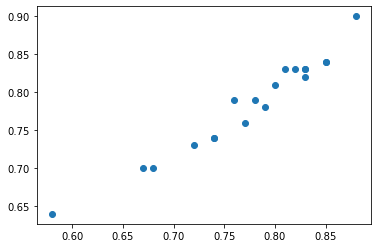

In [24]:
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)

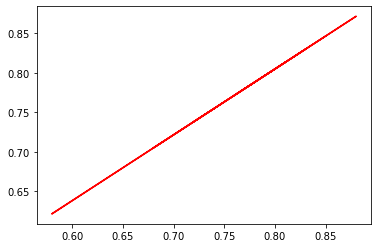

In [25]:
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')

Text(0, 0.5, 'Mean Accuracy (LOOCV)')

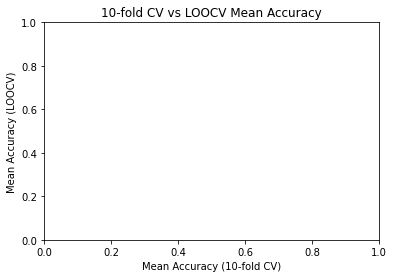

In [26]:
# label the plot
pyplot.title('10-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')